># 신경망

- 딥러닝이란 일반적으로 머신러닝 방법 중 하나인 신경망의 레이어를 깊게 만든것을 지칭

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


def plot_boundary():
    # 0.05간격으로 그리드 점 생성하기
    xx, yy = np.meshgrid(np.arange(-5, 5, 0.05),
                         np.arange(-5, 5, 0.05))
    # 생성한 그리드의 점을 하나하나 추론하기
    Z = predict(np.c_[xx.ravel(), yy.ravel()])

    # 그래프를 그릴 수 있게 2차원 배열로 변환하기
    Z = Z.reshape(xx.shape)

    # 식별 경계를 기준으로 영역을 색칠하기
    plt.contourf(xx, yy, Z, cmap=plt.cm.Blues, alpha=0.5)
    plt.colorbar(ticks=[0, 0.5, 1])

    # 식별 경계 그리기
    plt.contour(xx, yy, Z, colors='k', levels=[0], linestyles=['-'])
    


# 단순한 퍼셉트론
def predict(X_dataset):
    pred = []
    for X in X_dataset:
        a_out = 1 if (np.dot(w, X) + b) > 0 else 0
        pred.append(a_out)
    return np.array(pred, dtype=np.float32)

___
>## 다층 퍼셉트론

- 하나의 퍼셉트론은 굉장히 단순한 식별기로, 복잡한 식별 경계를 만들 수 없음
- 하지만 다층 퍼셉트론으로 여러개의 퍼셉트론을 쌓으면 비선형 식별경계를 만들 수 있음
- 여기서 **다층 퍼셉트론<sub>(Multi Layer Perceptron, MLP)<sub/>**을 **신경망<sub>(Neural Network)<sub/>**이라고 부름

- 하나의 간단한 신경망을 가정해 보자:
>- 입력층은 x0, x1 2개로 이루어짐
>- 출력층은 y 1개로 이루어짐
>- 중간에 은닉층이 1개 있고, 유닛 2개(퍼셉트론 2개: A1, A2)로 구성되어 있음
>- 유닛은 각각 x0, x1에 대해 x0>0, x1>0의 판별식을 갖게 됨 (`w = [1, 0]', 'w=[0, 1]`)

- 위의 유닛은 각각 아래와 같은 식별 경계를 나타냄

/usr/local/envs/py3env/lib/python3.5/site-packages/matplotlib/contour.py:1180: UserWarning: No contour levels were found within the data range.
  warnings.warn("No contour levels were found"
/usr/local/envs/py3env/lib/python3.5/site-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


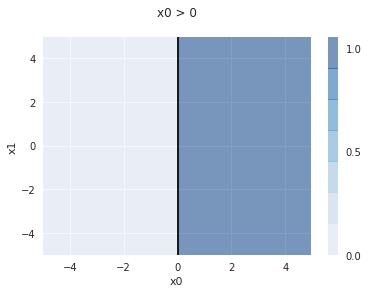

Text(0.5,1,'x1 > 0\n')

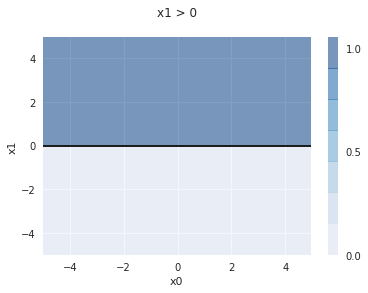

In [8]:
w = [1., 0.]
b = 0.

plot_boundary()
plt.xlabel('x0')
plt.ylabel('x1')
plt.title('x0 > 0\n')
plt.show()

w = [0., 1.]
b = 0.

plot_boundary()
plt.xlabel('x0')
plt.ylabel('x1')
plt.title('x1 > 0\n')

- 위와 같은 A1, A2 유닛의 출력은 (0, 1)로 구분되므로, 총 4종류로 둘의 조합을 나타낼 수 있음  

A1|A2|조건
---|---|---
0|0|not(x0>0) and not(x1>0)
0|1|not(x0>0) and x1>0
1|0|x0>0 and not(x1>0)
1|1|x0>0 and x1>0

- A1==1, A2==1일 때만 1을 반환하게 조건을 추가한다면 다음과 같은 입출력 조합 반환  

A1|A2|B1(가칭)
---|---|---
0|0|0
0|1|0
1|0|0
1|1|1

- 위의 입출력 관계만으로 가중치를 조절하기는 어려움이 있으므로, 시각화를 해 보면 다음과 같음

/usr/local/envs/py3env/lib/python3.5/site-packages/matplotlib/contour.py:1180: UserWarning: No contour levels were found within the data range.
  warnings.warn("No contour levels were found"


(-2, 2)

/usr/local/envs/py3env/lib/python3.5/site-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


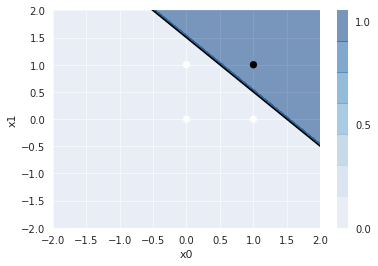

In [16]:
# 가중치와 바이어스 설정하기
w = [1., 1.]
b = -1.5
  
plot_boundary()
plt.xlabel('x0')
plt.ylabel('x1')

plt.scatter(x = [0, 0, 1, 1], y = [0, 1, 0, 1], c= [0, 0, 0, 1])
plt.ylim(-2, 2)
plt.xlim(-2, 2)